# 1) Base line CNN implementation

**Warning** : This notebook was created with [Colab](https://colab.research.google.com). Measured times were performed in GPU mode. This will use a large part of RAM for dataset proccessing, so please reset the runtime and run all cells. 




In [0]:
!rm dogImages.zip
!rm -rf dogImages
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip -qq dogImages.zip
!rm *.py
!wget https://raw.githubusercontent.com/mrugeles/dog_breeds/master/data_utils.py
!wget https://raw.githubusercontent.com/mrugeles/dog_breeds/master/model_utils.py

rm: cannot remove 'dogImages.zip': No such file or directory
--2019-05-09 11:51:14--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.153
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  41.7MB/s    in 27s     

2019-05-09 11:51:41 (40.6 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

rm: cannot remove '*.py': No such file or directory
--2019-05-09 11:51:57--  https://raw.githubusercontent.com/mrugeles/dog_breeds/master/data_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
H

In [0]:
import data_utils
import model_utils
import time

BATCH_SIZE = 16
TRAIN_PATH = './dogImages/train'
VALID_PATH = './dogImages/valid'
TEST_PATH = './dogImages/test'

WEIGHTS_FILE = 'weights.base.hdf5'
MODEL_FILE = 'weights.base.json'


Using TensorFlow backend.


In [0]:
train_files, train_targets, valid_files, valid_targets, test_files, test_targets, dog_names = data_utils.load_datasets(TRAIN_PATH, VALID_PATH, TEST_PATH, True)


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


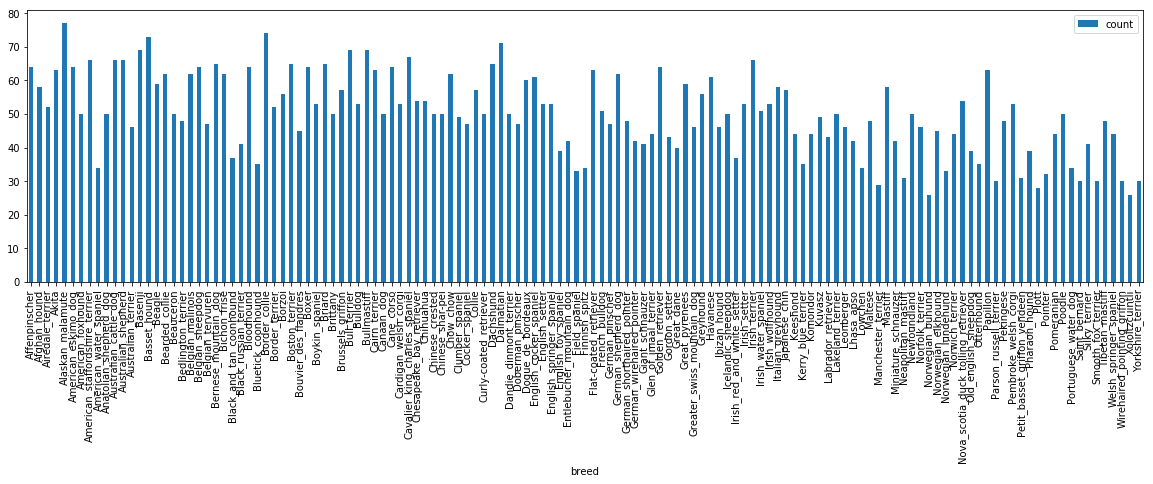

In [0]:
data_utils.show_target_distribution(TRAIN_PATH)

In [0]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = data_utils.paths_to_tensor(train_files).astype('float32')/255
valid_tensors = data_utils.paths_to_tensor(valid_files).astype('float32')/255
test_tensors = data_utils.paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:07<00:00, 110.58it/s]


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

def model_1():
  model = Sequential()

  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)))

  model.add(GlobalAveragePooling2D())
  model.add(Dense(133, activation='softmax'))
  return model

def model_2():
  model = Sequential()

  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)))
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
  

  model.add(GlobalAveragePooling2D())
  model.add(Dense(133, activation='softmax'))
  return model

def model_3():
  model = Sequential()

  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)))
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  

  model.add(GlobalAveragePooling2D())
  model.add(Dense(133, activation='softmax'))
  return model

def model_4():
  model = Sequential()

  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)))
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))

  model.add(GlobalAveragePooling2D())
  model.add(Dense(133, activation='softmax'))
  return model


def model_4():
  model = Sequential()


  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)))
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  model.add(Dense(133, activation='softmax'))

  return model

In [0]:

def train_model(model):
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  from keras.callbacks import ModelCheckpoint  

  ### TODO: specify the number of epochs that you would like to use to train the model.

  epochs = 100

  ### Do NOT modify the code below this line.

  checkpointer = ModelCheckpoint(filepath=WEIGHTS_FILE, 
                                 verbose=0, save_best_only=True)

  history = model.fit(train_tensors, 
                      train_targets, 
                      validation_data=(valid_tensors, valid_targets),
                      epochs=epochs, 
                      batch_size=32, 
                      callbacks=[checkpointer], 
                      verbose=0)
  return model, history

rm: cannot remove 'WEIGHTS_FILE': No such file or directory


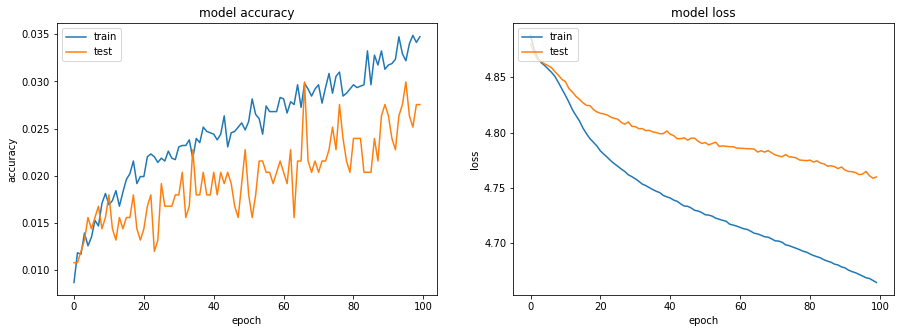

Model 1 accuracy: 3.3493%
Training time: 13.2768% minutes


In [0]:
!rm WEIGHTS_FILE
start_time = time.time()
model = model_1()

model, history = train_model(model)
model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, WEIGHTS_FILE, test_tensors, test_targets)
print('Model 1 accuracy: %.4f%%' % accuracy)
end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))

rm: cannot remove 'WEIGHTS_FILE': No such file or directory


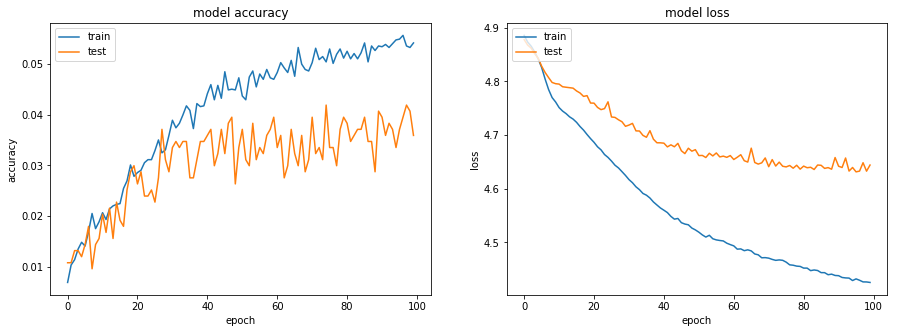

Model 2 accuracy: 3.2297%
Training time: 27.5621% minutes


In [0]:
!rm WEIGHTS_FILE
start_time = time.time()
model = model_2()

model, history = train_model(model)
model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, WEIGHTS_FILE, test_tensors, test_targets)
print('Model 2 accuracy: %.4f%%' % accuracy)
end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))

rm: cannot remove 'WEIGHTS_FILE': No such file or directory


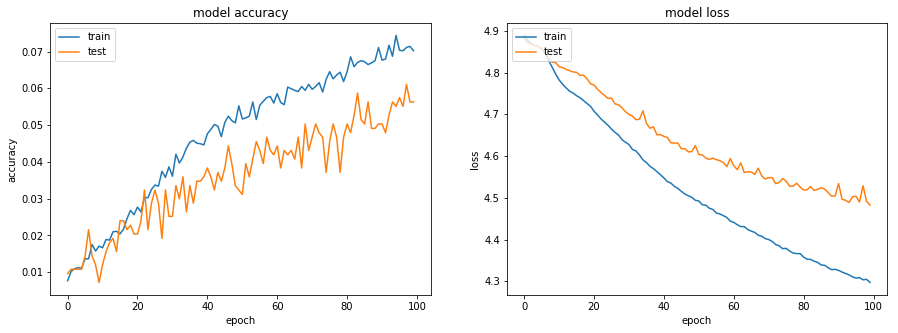

Model 3 accuracy: 5.1435%
Training time: 26.9083% minutes


In [0]:
!rm WEIGHTS_FILE
start_time = time.time()
model = model_3()

model, history = train_model(model)
model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, WEIGHTS_FILE, test_tensors, test_targets)
print('Model 3 accuracy: %.4f%%' % accuracy)
end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))

rm: cannot remove 'WEIGHTS_FILE': No such file or directory


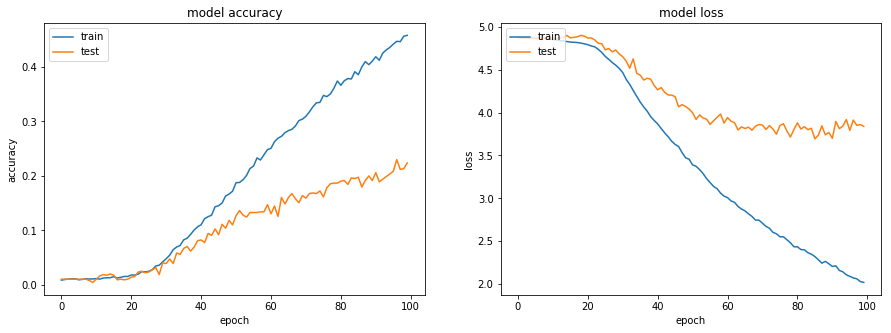

Model 4 accuracy: 20.5742%
Training time: 46.4994% minutes


In [0]:
!rm WEIGHTS_FILE
start_time = time.time()
model = model_4()

model, history = train_model(model)
model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, WEIGHTS_FILE, test_tensors, test_targets)
print('Model 4 accuracy: %.4f%%' % accuracy)
end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))

Conv2D(16) -> GlobalAveragePooling2D -> Dense

Conv2D(16) -> Conv2D(16) -> GlobalAveragePooling2D -> Dense

Conv2D(16) -> Conv2D(16) -> MaxPooling2D(2) -> GlobalAveragePooling2D -> Dense

Conv2D(16) -> Conv2D(16) -> MaxPooling2D(2) -> Conv2D(32) -> Conv2D(32) -> MaxPooling2D(2) -> GlobalAveragePooling2D -> Dense

Conv2D(16) -> Conv2D(16) -> MaxPooling2D(2) -> Conv2D(32) -> Conv2D(32) -> MaxPooling2D(2) ->  Conv2D(64) -> Conv2D(64) -> MaxPooling2D(2) -> GlobalAveragePooling2D -> Dense

In [2]:
import pandas as pd
data = {
    'Model ': ['Model 1', 'Model 2', 'Model 3', 'Model 4'], 
    'Accuracy': [3.3493, 3.2297, 5.1435, 20.5742], 
    'Training Time':[13.2768, 27.5621, 26.9083, 46.4994]}

models_data = pd.DataFrame.from_dict(data)

display(models_data)


,Model,Accuracy,Training Time
0,Model 1,3.3493,13.2768
1,Model 2,3.2297,27.5621
2,Model 3,5.1435,26.9083
3,Model 4,20.5742,46.4994


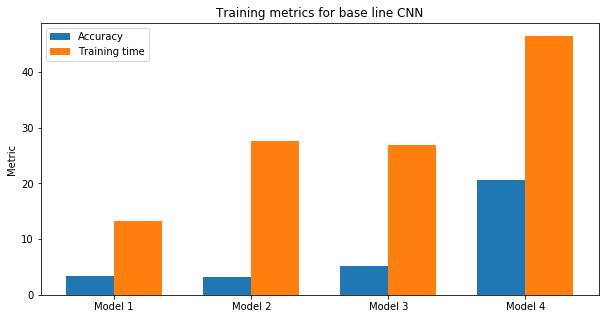

In [1]:
import matplotlib.pyplot as plt
import numpy as np

N = 4
accuracy = (3.3493, 3.2297, 5.1435, 20.5742)
training_time = (13.2768, 27.5621, 26.9083, 46.4994)

ind = np.arange(N) 
width = 0.35    
plt.subplots(1, 1, figsize=(10, 5))
plt.bar(ind, accuracy, width, label='Accuracy')
plt.bar(ind + width, training_time, width, label='Training time')

plt.ylabel('Metric')
plt.title('Training metrics for base line CNN')

plt.xticks(ind + width / 2, ('Model 1', 'Model 2', 'Model 3', 'Model 4'))
plt.legend(loc='best')
plt.show()